## Morphological transformations

이미지를 segmentation 하여 단순화, 제거, 보정을 통해서 형태를 파악하려는 목적으로 사용.

### Structuring element
원본 이미지에 적용되는 kernel. 중심은 보통 원점이나, 중심을 변경할 수 있음

### Erosion
각 픽셀에 structuring element 를 적용하여 하나라도 0이 있으면 대상 pixel을 제거하는 방법
(겹치지 않는 부분이 있으면 픽셀을 제거하는 것)
(작은 물체를 지워버린)

`cv2.erode(src, kernel, dst, anchor, iterations, borderType, borderValue)`
- src: 데이터타입이 정해져 있음
- kernel: Structuring element
- anchor: Structuring element의 중심
- iteration: erosion 적용 반복 횟수
- borderType : 보간 방법
- borderValue : 상수 border 일때 적용 값

### Dilation
Erosion 과 반대로 대상을 확장한 후 작은 구멍을 채우는 방법.

겹치는 부분이 하나라도 있으면 이미지를 확장한다.

결과적으로 경계가 부드러워 지고 구멍이 메꿔지는 효과를 얻을 수 있다.

`cv2.dilation(src, kernel, dst, anchor, iterations, borterType, borderValue)`

### Opening & Closing
Erosion과 Dilation의 조합 결과
- Opening : Erosion 적용후 Dilation 적용. 작은 Object나 돌기 제거에 적합
- Closing : Dilation 적용 후 Erosion 적용. 전체적인 윤곽 파악에 적합

`cv2.morphologyEx(src, op, kernel, st, anchor, iterations, borderType, bordervalue)`
- op
    - MORPH_OPEN : opening
    - MORPH_CLOSE : closing
    - MORPH_GRADIENT : Dilation과 erosion의 차이
    - MORPH_TOPHAT : Opening과 원본 이미지의 차이
    - MORPH_BLACKHAT : Closing과 원본 이미지의 차이

### Structuring Element
`cv2.getStructuringElement()` 함수를 이용해서 만들 수 있다.

`cv2.getStructuringElement(shape, ksize, anchor)`
- shape
    - MORPH_RET : 사각형
    - MORPH_ELLIPSE : 타원형 모양
    - MORPH_CROSS : 십자 모양
- ksize : structuring element 사이즈

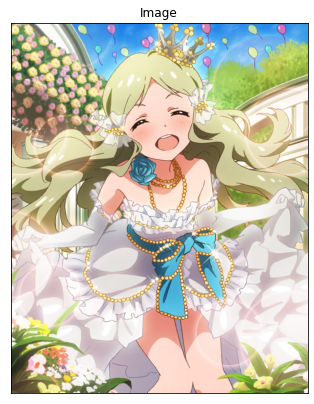

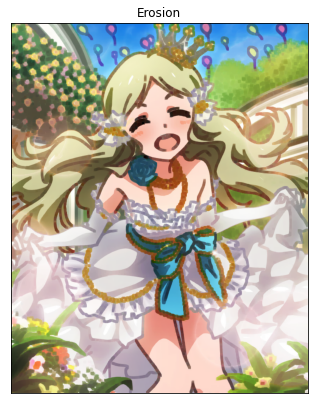

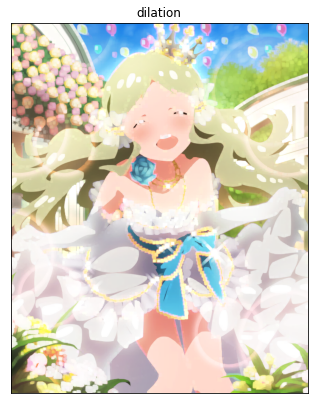

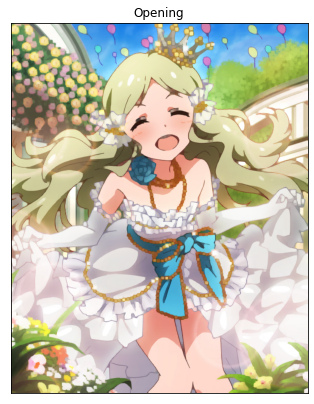

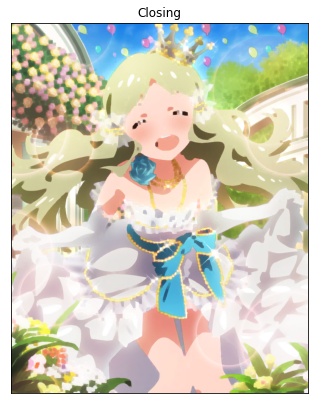

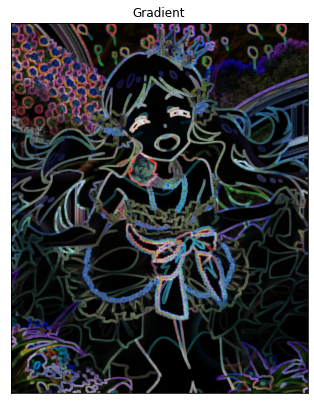

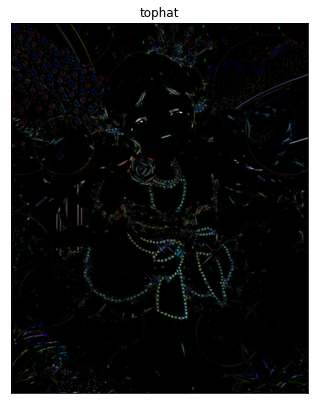

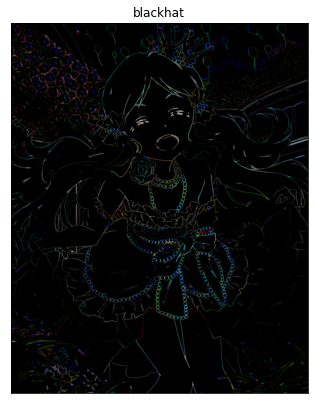

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("Images/Sample_mili3.jpg")

b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

images = [img, erosion, dilation, opening, closing, gradient, tophat, blackhat]
titles = ["Image", "Erosion", "dilation", "Opening", "Closing", "Gradient", "tophat", "blackhat"]

for i in range(8):
    plt.figure(figsize=(50, 50))
    plt.subplot(1, 8, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [3]:
img.shape

(802, 642, 3)